# Introduction to Portfolio Theory: Benchmark #

In [11]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import skew, kurtosis
from scipy.stats import chi2
from scipy.stats import jarque_bera
from scipy.stats import probplot
from scipy.stats import norm

# Visualization
import matplotlib.pyplot as plt

# Import Data
import yfinance as yf

# Pretty Notation
from IPython.display import display, Math

In [15]:
data = yf.download('^GSPC', start='2015-01-01', end='2025-01-01', interval='1d', auto_adjust=True)
data.dropna(inplace=True)

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


In [17]:
# Calculate the Returns

data['Returns'] = data['Close'].pct_change(1).mul(100)
data.dropna(inplace=True)

data

Price,Close,High,Low,Open,Volume,Returns
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-1.827811
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.889347
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,1.162984
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,1.788828
2015-01-09,2044.810059,2064.429932,2038.329956,2063.449951,3364140000,-0.840381
...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,1.104276
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,-0.040566


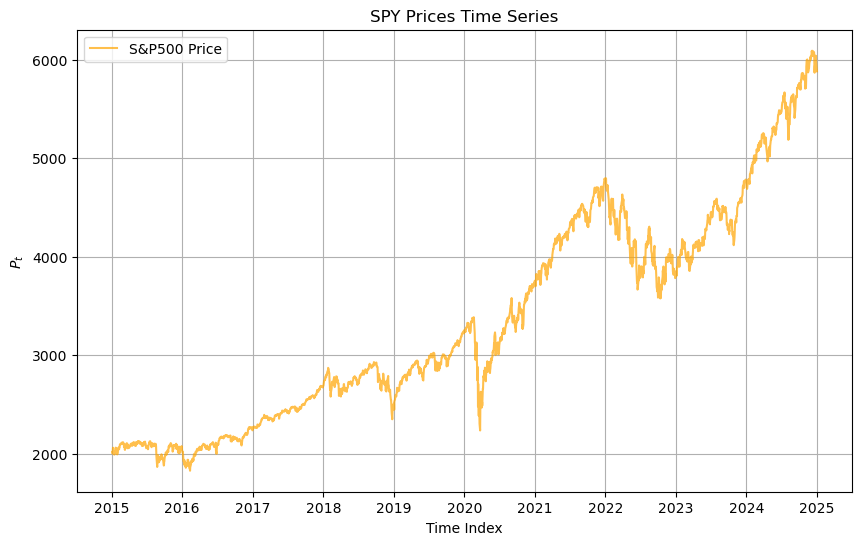

In [19]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='S&P500 Price', color='orange', alpha=0.7)

# Config
plt.title('SPY Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [21]:
data.mean()

Price    Ticker
Close    ^GSPC     3.356641e+03
High     ^GSPC     3.373970e+03
Low      ^GSPC     3.336986e+03
Open     ^GSPC     3.356175e+03
Volume   ^GSPC     4.007549e+09
Returns            4.809069e-02
dtype: float64

In [23]:
data.std()

Price    Ticker
Close    ^GSPC     1.083805e+03
High     ^GSPC     1.089053e+03
Low      ^GSPC     1.078084e+03
Open     ^GSPC     1.083620e+03
Volume   ^GSPC     9.538222e+08
Returns            1.123039e+00
dtype: float64

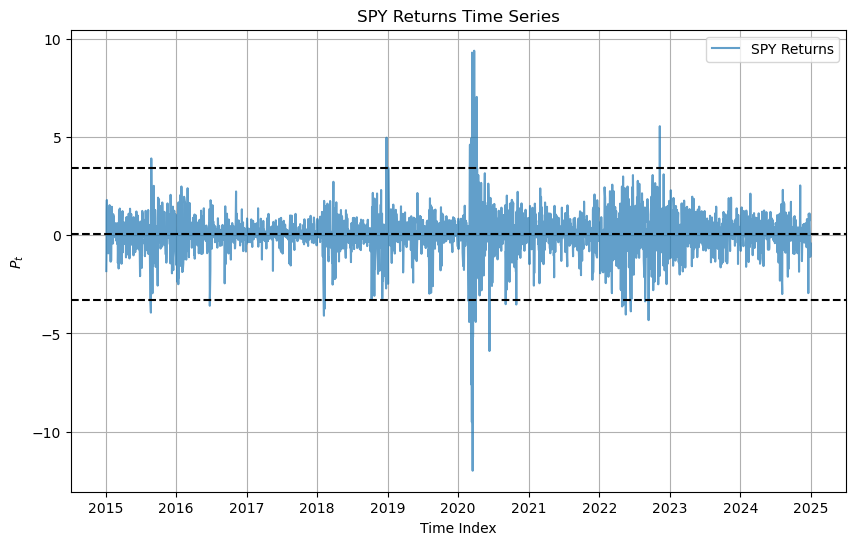

In [25]:
# Time Series Graphs

upper_lim = data['Returns'].mean() + 3*data['Returns'].std()
lower_lim = data['Returns'].mean() - 3*data['Returns'].std()

plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], label='SPY Returns', alpha=0.7)
plt.axhline(y=data['Returns'].mean(), color='black', linestyle='dashed')
plt.axhline(y=upper_lim, color='black', linestyle='dashed')
plt.axhline(y=lower_lim, color='black', linestyle='dashed')

# Config
plt.title('SPY Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

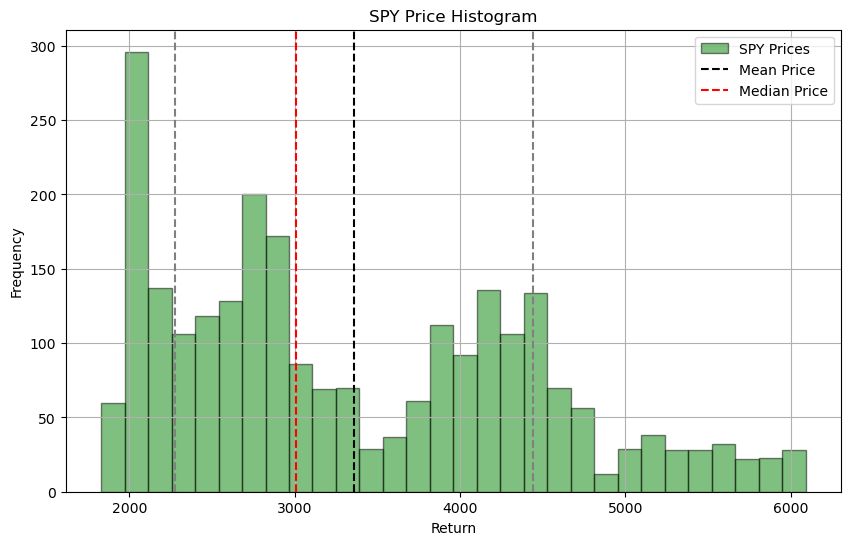

In [27]:
# Create a Histogram of Prices

mean_p = data['Close'].mean().item()
median_p = data['Close'].median().item()
upper_lim_p = (data['Close'].mean() + data['Close'].std()).item()
lower_lim_p = (data['Close'].mean() - data['Close'].std()).item()

plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='green', alpha=0.5, edgecolor='black', label='SPY Prices')

# Mean and Standard Deviation
plt.axvline(x=mean_p, color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=median_p, color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_p, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_p, color='grey', linestyle='dashed')

# Config
plt.title('SPY Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

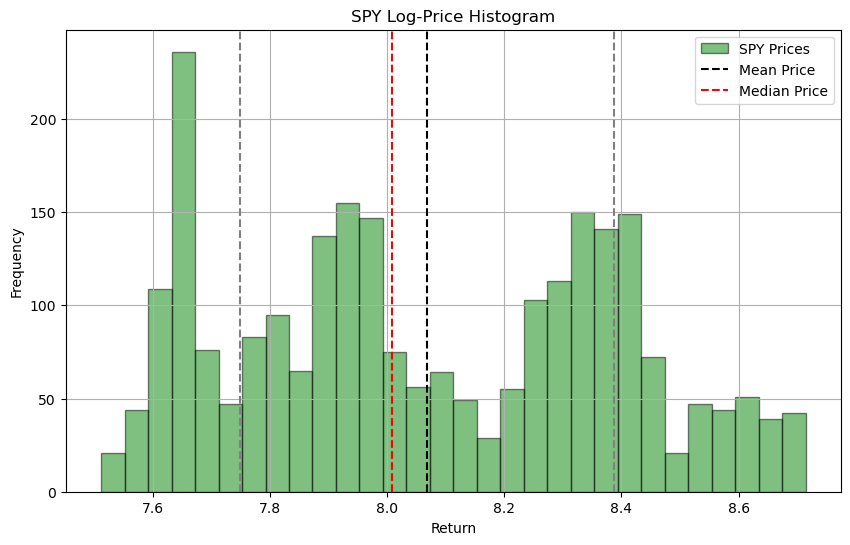

In [29]:
# Create a Histogram of Log Prices

mean_lp = np.log(data['Close']).mean().item()
median_lp = np.log(data['Close']).median().item()
upper_lim_lp = (np.log(data['Close']).mean() + np.log(data['Close']).std()).item()
lower_lim_lp = (np.log(data['Close']).mean() - np.log(data['Close']).std()).item()

plt.figure(figsize=(10, 6))
plt.hist(np.log(data['Close']), bins=30, color='green', alpha=0.5, edgecolor='black', label='SPY Prices')

# Mean and Standard Deviation
plt.axvline(x=mean_lp, color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=median_lp, color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_lp, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_lp, color='grey', linestyle='dashed')

# Config
plt.title('SPY Log-Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

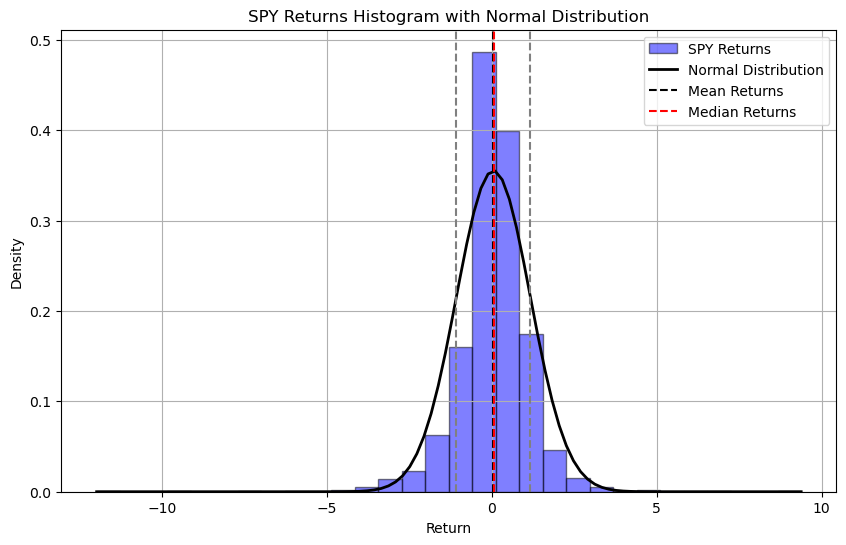

In [31]:
# Calculate Mean and Standard Deviation
mu = data['Returns'].mean()
sigma = data['Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'], bins=30, density=True, color='blue', alpha=0.5, edgecolor='black', label='SPY Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(data['Returns'].min(), data['Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=data['Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('SPY Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [33]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = data['Returns'].mean() + stds*data['Returns'].std()
lower_lim = data['Returns'].mean() - stds*data['Returns'].std()

inside_one_std = data[(data['Returns'] >= lower_lim) & (data['Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(data))*100

print(percentage)

79.32405566600397


In [35]:
# Calculate Skewness
skewness = skew(data['Returns'].dropna())

# Calculate Kurtosis
kurt = kurtosis(data['Returns'].dropna())

print(f"Mean: {data['Returns'].dropna().mean()}")
print(f"Variance: {data['Returns'].dropna().var()}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 0.048090691033244516
Variance: 1.2612155512292302
Skewness: -0.527664637195842
Kurtosis: 14.56472224317794


In [37]:
# Normality Test

jb_stat, p_value = jarque_bera(data['Returns'].dropna())

print(f"Jarque-Bera Stat: {jb_stat}")
print(f"p-value: {p_value}")

Jarque-Bera Stat: 22346.283648093773
p-value: 0.0


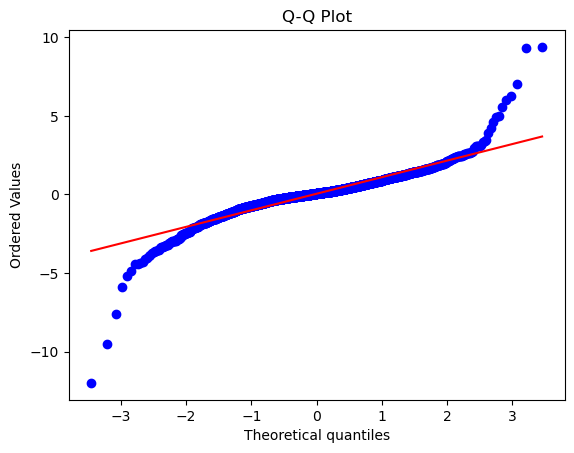

In [39]:
# Prices QQ Plot

probplot(data['Returns'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [49]:
# Store the Benchmark
benchmark = data['Close']
benchmark.columns = ['sp_500']

benchmark

,sp_500
Date,
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
2015-01-09,2044.810059
...,...
2024-12-24,6040.040039
2024-12-26,6037.589844
2024-12-27,5970.839844


In [51]:
benchmark.to_csv(r"..\additional_data\sp500.csv")